In [10]:
import imageio as imo
import matplotlib.pyplot as plt

In [11]:
im = imo.imread('../datasets/azm/IM-0009-0454.dcm')
im.meta

Dict([('Rows', 512),
      ('ContentTime', u'094645.491000 '),
      ('RescaleSlope', 1.0),
      ('SeriesTime', u'094713.244000 '),
      ('TransferSyntaxUID', u'1.2.840.10008.1.2.1'),
      ('InstanceNumber', 454),
      ('shape', (512, 512)),
      ('PatientSex', u'M '),
      ('SOPInstanceUID',
       u'1.3.12.2.1107.5.1.4.95568.30000017091800574405500002219'),
      ('ContentDate', u'20170918'),
      ('RescaleIntercept', -1024.0),
      ('Columns', 512),
      ('PixelSpacing', (0.814453125, 0.814453125)),
      ('SeriesDate', u'20170918'),
      ('SeriesNumber', 4),
      ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)),
      ('HighBit', 11),
      ('AcquisitionNumber', 4),
      ('InstitutionName', u'IIUM Medical Centre'),
      ('StudyTime', u'093107.536000 '),
      ('PatientAge', u'054Y'),
      ('BitsStored', 12),
      ('ImagePositionPatient', (-199.0927734375, -384.0927734375, -20.2)),
      ('Manufacturer', u'SIEMENS'),
      ('StudyDate', u'20170918'),
      

(-0.5, 511.5, 511.5, -0.5)

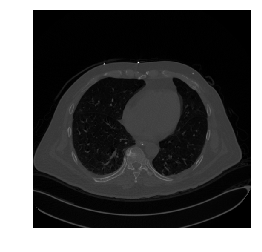

In [14]:
plt.imshow(im, cmap='gray')
plt.axis('off')